# Predict Rain in Australia
This notebook is designed to use SciKit Learn and Tensorflow to predict rain in the future.

The model being used are :
- Logistic Regression
- K Means Clustering
- Gradient Boosting Decision Tree
- Random Forest

# 1. Load Data and Packages
Load basic required packages:
- Data Analysis: Numpy, pandas
- Data Visualisation: Matplotlib, Seaborn
- Machine Learning: Tensorflow and SciKit Learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv("data/weather-training-data.csv")
print(f"Shape: {df_train.shape}")
df_train.head()

Shape: (99516, 23)


,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [3]:
df_test = pd.read_csv("data/weather-test-data.csv")
print(f"Shape: {df_test.shape}")
df_test.head()

Shape: (42677, 22)


,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes


# 2. Data Cleaning

Clean unwanted data

In [4]:
df_train = df_train.drop(['row ID'], axis=1)
df_train['MinTemp']=df_train['MinTemp'].fillna(df_train['MinTemp'].mean())
df_train['MaxTemp']=df_train['MaxTemp'].fillna(df_train['MaxTemp'].mean())
df_train['Rainfall']=df_train['Rainfall'].fillna(df_train['Rainfall'].mean())
df_train['Evaporation']=df_train['Evaporation'].fillna(df_train['Evaporation'].mean())
df_train['Sunshine']=df_train['Sunshine'].fillna(df_train['Sunshine'].mean())
df_train['WindGustSpeed']=df_train['WindGustSpeed'].fillna(df_train['WindGustSpeed'].mean())
df_train['WindSpeed9am']=df_train['WindSpeed9am'].fillna(df_train['WindSpeed9am'].mean())
df_train['WindSpeed3pm']=df_train['WindSpeed3pm'].fillna(df_train['WindSpeed3pm'].mean())
df_train['Humidity9am']=df_train['Humidity9am'].fillna(df_train['Humidity9am'].mean())
df_train['Humidity3pm']=df_train['Humidity3pm'].fillna(df_train['Humidity3pm'].mean())
df_train['Pressure9am']=df_train['Pressure9am'].fillna(df_train['Pressure9am'].mean())
df_train['Pressure3pm']=df_train['Pressure3pm'].fillna(df_train['Pressure3pm'].mean())
df_train['Cloud9am']=df_train['Cloud9am'].fillna(df_train['Cloud9am'].mean())
df_train['Cloud3pm']=df_train['Cloud3pm'].fillna(df_train['Cloud3pm'].mean())
df_train['Temp9am']=df_train['Temp9am'].fillna(df_train['Temp9am'].mean())
df_train['Temp3pm']=df_train['Temp3pm'].fillna(df_train['Temp3pm'].mean())

Count **wind gust directions**

In [5]:
df_train['WindGustDir'].value_counts()

W      6843
SE     6475
E      6341
SSE    6329
N      6323
SW     6233
S      6228
WSW    6164
SSW    6023
WNW    5664
NW     5599
ENE    5558
ESE    5101
NE     4956
NNW    4589
NNE    4569
Name: WindGustDir, dtype: int64

In [6]:
df_train["WindDir9am"].value_counts()

N      8052
E      6333
SE     6311
SSE    6214
S      5995
NW     5975
SW     5808
W      5790
NNE    5600
NNW    5457
ENE    5357
NE     5323
ESE    5312
SSW    5147
WNW    5041
WSW    4795
Name: WindDir9am, dtype: int64

In [7]:
df_train["WindDir3pm"].value_counts()

SE     7410
W      6897
S      6653
WSW    6640
SW     6451
SSE    6386
N      6065
WNW    6063
NW     5917
ESE    5850
E      5839
NE     5710
SSW    5576
NNW    5437
ENE    5413
NNE    4561
Name: WindDir3pm, dtype: int64

Fill **null value**

In [8]:
df_train['WindGustDir']=df_train['WindGustDir'].fillna(df_train['WindGustDir'].value_counts().idxmax())
df_train['WindDir9am']=df_train['WindDir9am'].fillna(df_train['WindDir9am'].value_counts().idxmax())
df_train['WindDir3pm']=df_train['WindDir3pm'].fillna(df_train['WindDir3pm'].value_counts().idxmax())
print(df_train.isnull().sum())

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        979
RainTomorrow       0
dtype: int64


In [9]:
df_train["RainToday"] = df_train['RainToday'].fillna(df_train["RainTomorrow"].shift())

In [10]:
print(df_train.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


Update **dummy variable** to numeric value

In [11]:
df_train.loc[df_train.RainToday == "Yes", "RainToday"] = 1
df_train.loc[df_train.RainToday == "No", "RainToday"] = 0
df_train["RainToday"] = df_train['RainToday'].astype(int)
df_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.46132,7.61509,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,Albury,17.5,32.3,1.0,5.46132,7.61509,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


Apply the same procedure on test data

In [12]:
df_test = df_test.drop(['row ID'], axis=1)
df_test['MinTemp']=df_test['MinTemp'].fillna(df_test['MinTemp'].mean())
df_test['MaxTemp']=df_test['MaxTemp'].fillna(df_test['MaxTemp'].mean())
df_test['Rainfall']=df_test['Rainfall'].fillna(df_test['Rainfall'].mean())
df_test['Evaporation']=df_test['Evaporation'].fillna(df_test['Evaporation'].mean())
df_test['Sunshine']=df_test['Sunshine'].fillna(df_test['Sunshine'].mean())
df_test['WindGustSpeed']=df_test['WindGustSpeed'].fillna(df_test['WindGustSpeed'].mean())
df_test['WindSpeed9am']=df_test['WindSpeed9am'].fillna(df_test['WindSpeed9am'].mean())
df_test['WindSpeed3pm']=df_test['WindSpeed3pm'].fillna(df_test['WindSpeed3pm'].mean())
df_test['Humidity9am']=df_test['Humidity9am'].fillna(df_test['Humidity9am'].mean())
df_test['Humidity3pm']=df_test['Humidity3pm'].fillna(df_test['Humidity3pm'].mean())
df_test['Pressure9am']=df_test['Pressure9am'].fillna(df_test['Pressure9am'].mean())
df_test['Pressure3pm']=df_test['Pressure3pm'].fillna(df_test['Pressure3pm'].mean())
df_test['Cloud9am']=df_test['Cloud9am'].fillna(df_test['Cloud9am'].mean())
df_test['Cloud3pm']=df_test['Cloud3pm'].fillna(df_test['Cloud3pm'].mean())
df_test['Temp9am']=df_test['Temp9am'].fillna(df_test['Temp9am'].mean())
df_test['Temp3pm']=df_test['Temp3pm'].fillna(df_test['Temp3pm'].mean())

In [13]:
df_test['WindGustDir']=df_test['WindGustDir'].fillna(df_test['WindGustDir'].value_counts().idxmax())
df_test['WindDir9am']=df_test['WindDir9am'].fillna(df_test['WindDir9am'].value_counts().idxmax())
df_test['WindDir3pm']=df_test['WindDir3pm'].fillna(df_test['WindDir3pm'].value_counts().idxmax())

In [14]:
print(df_test.isnull().sum())

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        427
dtype: int64


In [15]:
df_test = df_test.dropna()
df_test.loc[df_test.RainToday == "Yes", "RainToday"] = 1
df_test.loc[df_test.RainToday == "No", "RainToday"] = 0
df_test["RainToday"] = df_test['RainToday'].astype(int)
df_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,12.9,25.7,0.0,5.489715,7.647831,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,4.412041,2.000000,21.0,23.2,0
1,Albury,9.2,28.0,0.0,5.489715,7.647831,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,4.412041,4.466054,18.1,26.5,0
2,Albury,14.3,25.0,0.0,5.489715,7.647831,W,50.0,SW,W,...,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.466054,18.1,24.6,0
3,Albury,9.7,31.9,0.0,5.489715,7.647831,NNW,80.0,SE,NW,...,28.0,42.0,9.0,1008.9,1003.6,4.412041,4.466054,18.3,30.2,0
4,Albury,15.9,18.6,15.6,5.489715,7.647831,W,61.0,NNW,NNW,...,28.0,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1


# 3. Data Analysis
Analysis the data before putting into machine learning.

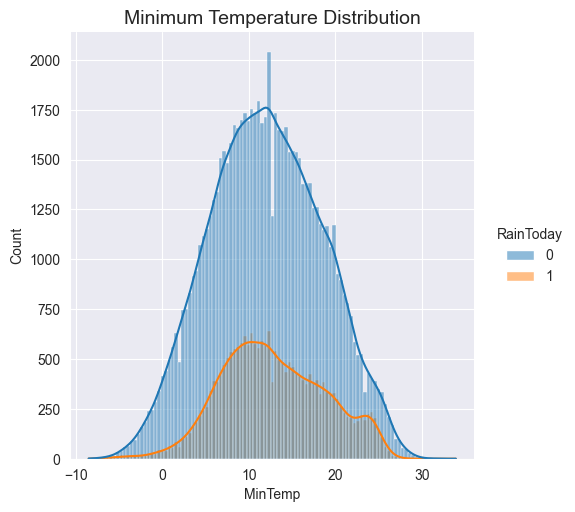

In [16]:
sns.displot(df_train, x="MinTemp", hue="RainToday", kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

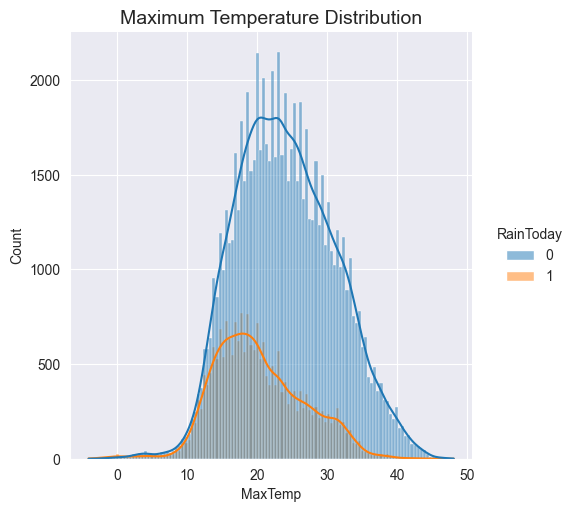

In [17]:
sns.displot(df_train, x="MaxTemp", hue="RainToday", kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

The maximum temperature of raining day is skewed to the left

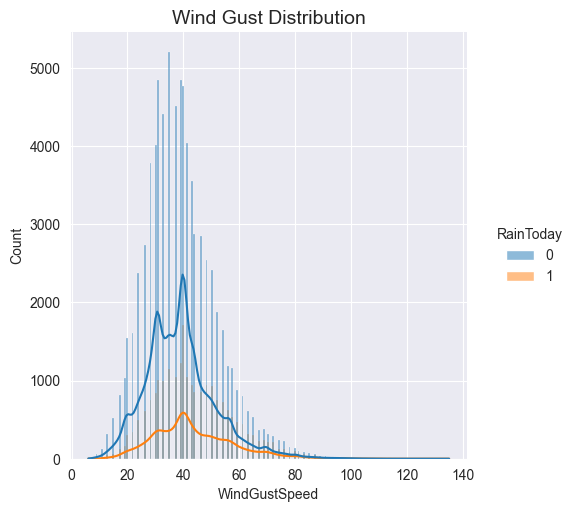

In [18]:
sns.displot(df_train, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

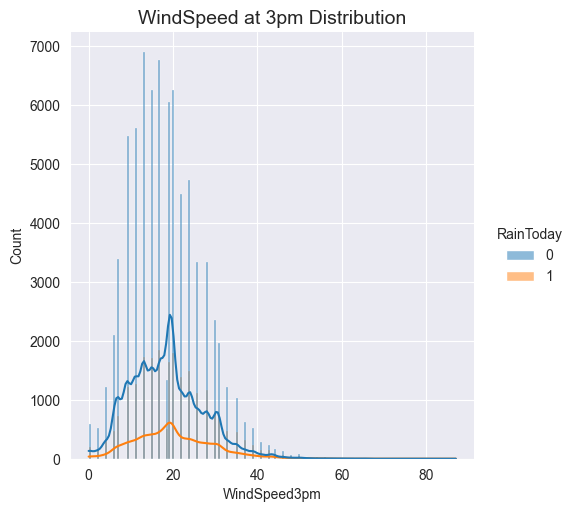

In [19]:
sns.displot(df_train, x="WindSpeed3pm", hue='RainToday', kde=True)
plt.title("WindSpeed at 3pm Distribution", fontsize = 14)
plt.show()

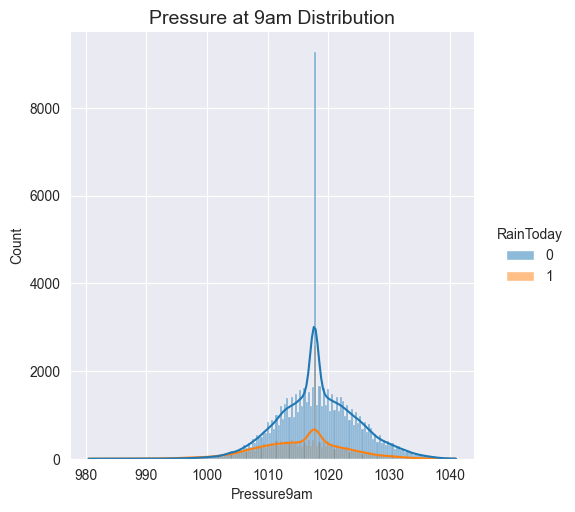

In [20]:
sns.displot(df_train, x="Pressure9am", hue='RainToday', kde=True)
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()

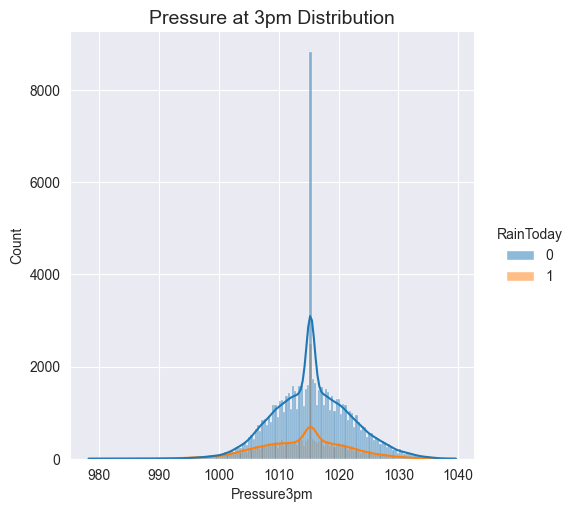

In [21]:
sns.displot(df_train, x="Pressure3pm", hue='RainToday', kde=True)
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

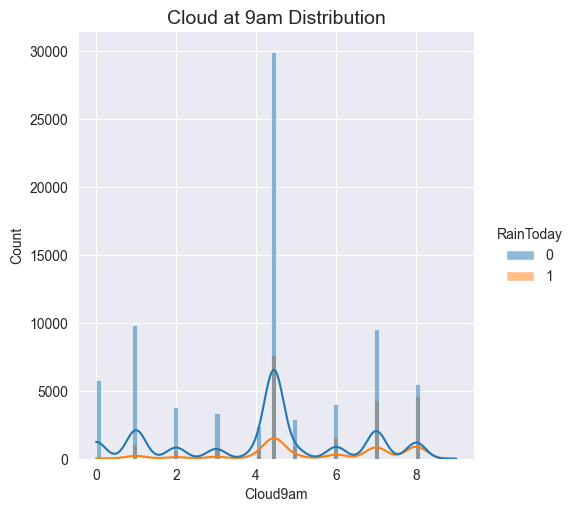

In [22]:
sns.displot(df_train, x="Cloud9am", hue='RainToday', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

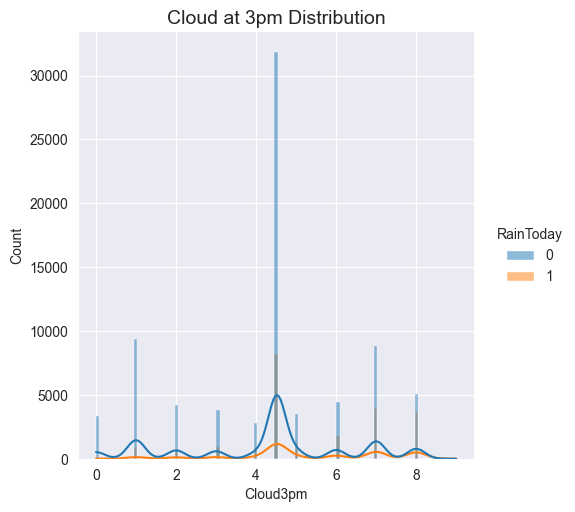

In [23]:
sns.displot(df_train, x="Cloud3pm", hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()

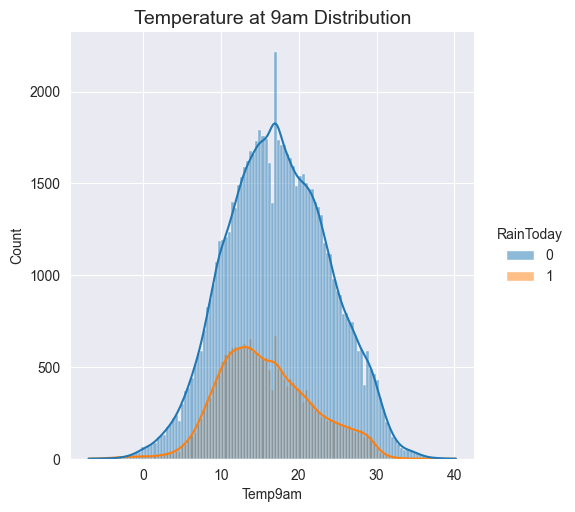

In [24]:
sns.displot(df_train, x="Temp9am", hue='RainToday', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()

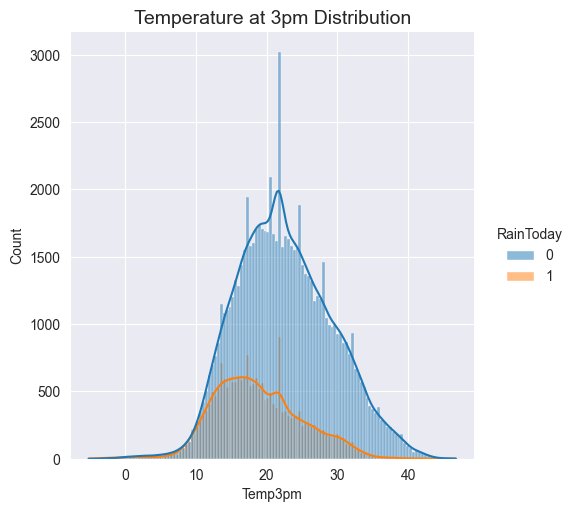

In [25]:
sns.displot(df_train, x="Temp3pm", hue='RainToday', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()

# 4. EDA

## Analysis of average wind speed

In [26]:
df_windspeed = df_train.groupby(["Location"])[["WindSpeed9am", "WindSpeed3pm"]].mean()
df_windspeed = df_windspeed.reset_index()
df_windspeed.head()

,Location,WindSpeed9am,WindSpeed3pm
0,Adelaide,10.005519,15.525070
1,Albany,12.564695,18.847500
2,Albury,8.208690,14.411579
3,AliceSprings,14.658804,18.019184
4,BadgerysCreek,8.132324,14.019945


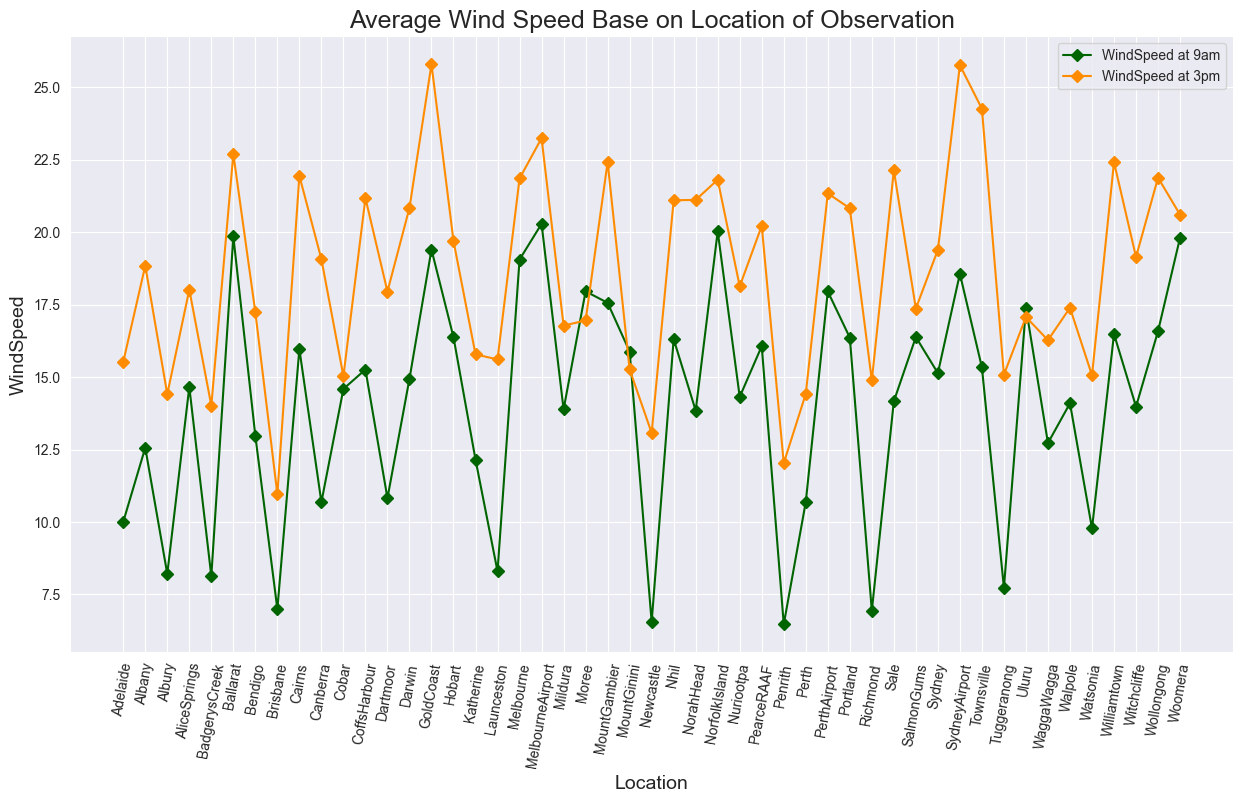

In [27]:
x = df_windspeed.loc[:, 'Location']
y1 = df_windspeed['WindSpeed9am']
y2 = df_windspeed['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'WindSpeed at 9am')
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'WindSpeed at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Average Wind Speed Base on Location of Observation', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

During this analysis, it has been found that the wind speed of the Melbourne Airport at 9 am.

On the other hand, at 3 pm the Gold Coast of Australia has the highest wind speed.

Wind speed at 3 pm is much higher than the wind speed at 9 am.

## Analysis of Average Humidity

In [28]:
df_humidity = df_train.groupby(["Location"])[["Humidity9am", "Humidity3pm"]].mean()
df_humidity = df_humidity.reset_index()
df_humidity.head()

,Location,Humidity9am,Humidity3pm
0,Adelaide,60.082001,45.008601
1,Albany,74.742430,63.826466
2,Albury,74.309461,48.107983
3,AliceSprings,39.875224,24.305207
4,BadgerysCreek,76.677018,51.166781


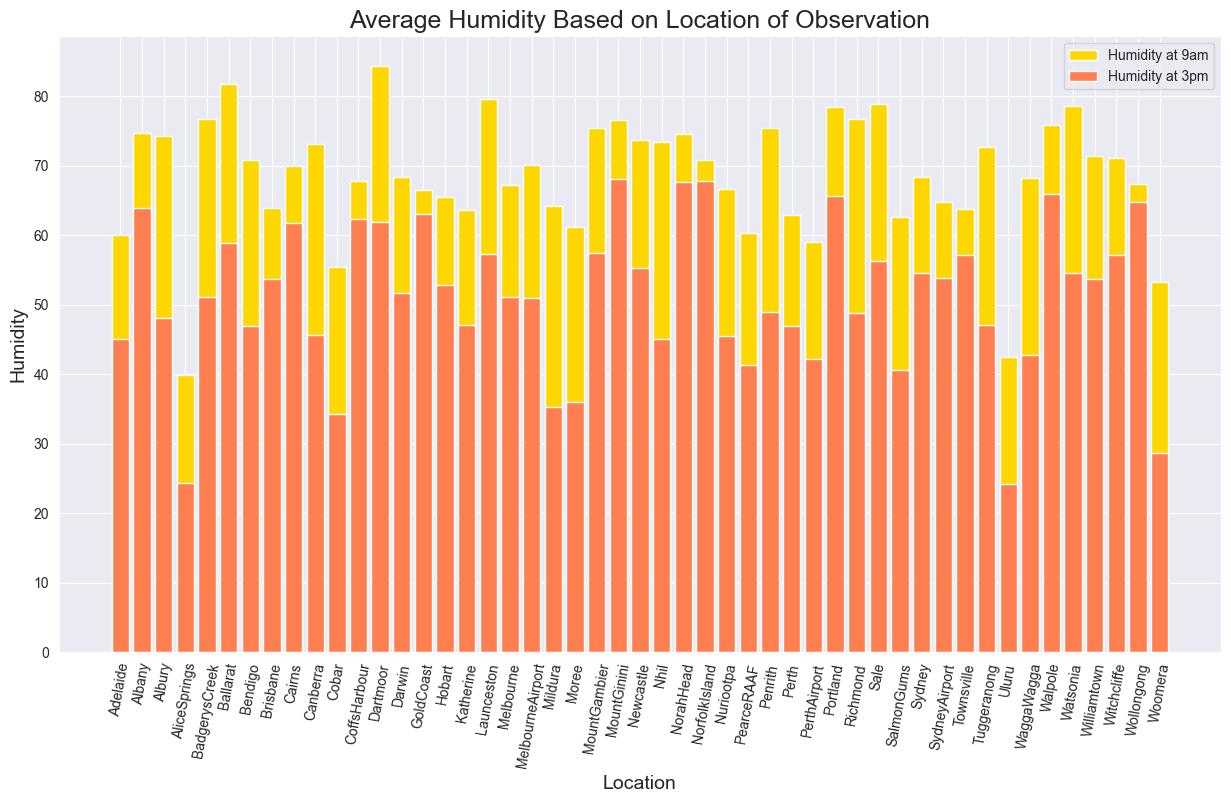

In [29]:
x = df_humidity.loc[:, 'Location']
y1 = df_humidity['Humidity9am']
y2 = df_humidity['Humidity3pm']

plt.figure(figsize = (15, 8))

plt.bar(x, y1, color = 'gold', label = 'Humidity at 9am')
plt.bar(x, y2, color = 'coral',label = 'Humidity at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title('Average Humidity Based on Location of Observation', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

Humidity of Dartmoor at 9 am has the highest humidity. On the other hand, at 3 pm the Mount Ginini has the highest humidity. Finally, it can be concluded that humidity at 9 am is much higher than the pressure at 3 pm

## Average Pressure Analysis

In [30]:
df_pressure = df_train.groupby(["Location"])[["Pressure9am", "Pressure3pm"]].mean()
df_pressure = df_pressure.reset_index()
df_pressure.head()

,Location,Pressure9am,Pressure3pm
0,Adelaide,1018.709193,1016.774348
1,Albany,1018.366913,1016.573801
2,Albury,1018.382073,1015.759551
3,AliceSprings,1016.610611,1012.806830
4,BadgerysCreek,1018.533488,1015.740251


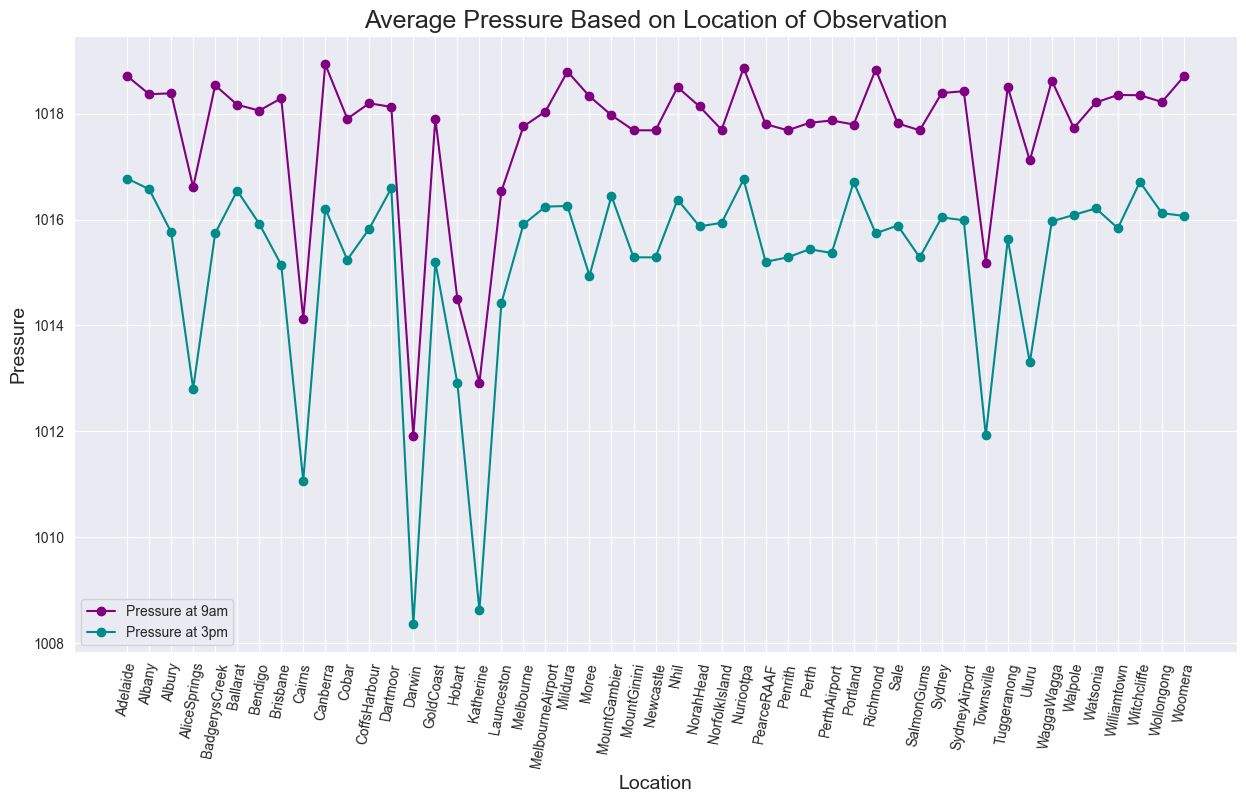

In [31]:
x = df_pressure.loc[:, 'Location']
y1 = df_pressure['Pressure9am']
y2 = df_pressure['Pressure3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'purple', label = 'Pressure at 9am')
plt.plot(x, y2, marker='o', color = 'darkcyan', label = 'Pressure at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Pressure', fontsize = 14)
plt.title('Average Pressure Based on Location of Observation', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

Pressure of Canberra at 9 am has the highest pressure.

On the other hand, at 3 pm the Adelaide of Australia has the highest pressure.

Finally, it can be concluded that pressure at 9 am is much higher than the pressure at 3 pm.

## Average Temperature Analysis

In [32]:
df_temperature = df_train.groupby(['Location'])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
df_temperature = df_temperature.reset_index()
df_temperature.head()

,Location,MinTemp,MaxTemp,Temp9am,Temp3pm
0,Adelaide,12.525150,22.781468,16.831685,21.449745
1,Albany,12.887445,20.036660,16.205778,19.097254
2,Albury,9.502057,22.529607,14.276363,21.260711
3,AliceSprings,13.219149,29.295517,21.379000,28.055253
4,BadgerysCreek,11.137181,23.961459,16.546600,22.458805


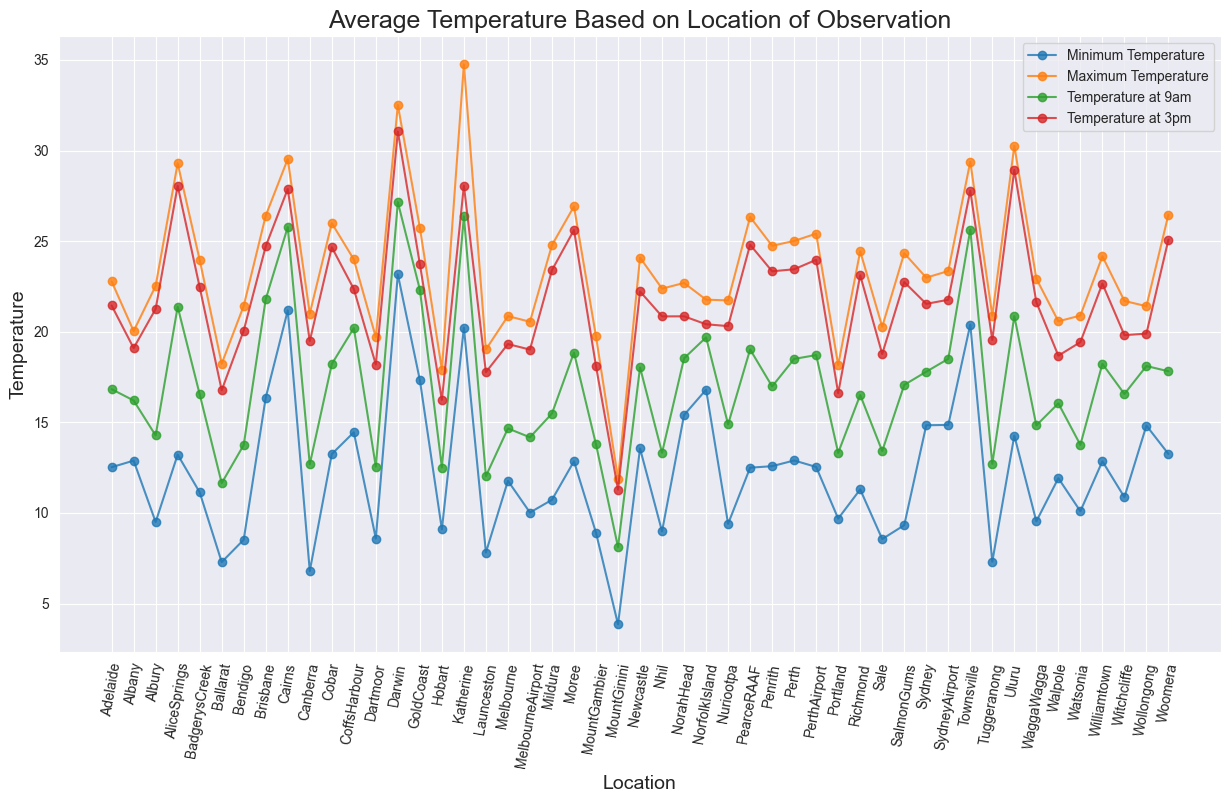

In [33]:
x = df_temperature.loc[:, 'Location']
y1 = df_temperature['MinTemp']
y2 = df_temperature['MaxTemp']
y3 = df_temperature['Temp9am']
y4 = df_temperature['Temp3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, label = 'Minimum Temperature', marker='o', alpha = 0.8)
plt.plot(x, y2, label = 'Maximum Temperature', marker='o', alpha = 0.8)
plt.plot(x, y3, label = 'Temperature at 9am', marker='o', alpha = 0.8)
plt.plot(x, y4, label = 'Temperature at 3pm', marker='o', alpha = 0.8)

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Average Temperature Based on Location of Observation', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

# 5. Predictive Analysis

## Feature Engineering
Extract numerical features and encode non-numeric features using OneHotEncoder in pandas package

In [34]:
df_train_numerical = df_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']]
df_train_numerical.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


In [35]:
# Apply OHE to non numerical data
col_categorical = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df_train_OHE = pd.get_dummies(df_train[col_categorical])
df_train_OHE.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Merge numerical and non numerical df together

In [36]:
df_train_clean = pd.concat([df_train_numerical, df_train_OHE], axis=1)
df_train_clean.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,...,0,0,0,0,0,0,0,1,0,0
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,...,0,0,0,0,0,0,0,1,0,0


Perform the same to **test dataset**

In [37]:
df_test_numerical = df_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                                                     'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
                                                     'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                                     'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                                     'Temp9am', 'Temp3pm', 'RainToday']]
df_test_numerical.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,12.9,25.7,0.0,5.489715,7.647831,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.412041,2.000000,21.0,23.2,0
1,9.2,28.0,0.0,5.489715,7.647831,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.412041,4.466054,18.1,26.5,0
2,14.3,25.0,0.0,5.489715,7.647831,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.466054,18.1,24.6,0
3,9.7,31.9,0.0,5.489715,7.647831,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,4.412041,4.466054,18.3,30.2,0
4,15.9,18.6,15.6,5.489715,7.647831,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8,1


In [38]:
df_test_OHE = pd.get_dummies(df_test[col_categorical])
df_test_OHE.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
df_test_final = pd.concat([df_test_numerical, df_test_OHE], axis=1)
df_test_final.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,12.9,25.7,0.0,5.489715,7.647831,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
1,9.2,28.0,0.0,5.489715,7.647831,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
2,14.3,25.0,0.0,5.489715,7.647831,50.0,20.0,24.0,49.0,19.0,...,0,0,0,0,0,0,0,1,0,0
3,9.7,31.9,0.0,5.489715,7.647831,80.0,7.0,28.0,42.0,9.0,...,0,1,0,0,0,0,0,0,0,0
4,15.9,18.6,15.6,5.489715,7.647831,61.0,28.0,28.0,76.0,93.0,...,1,0,0,0,0,0,0,0,0,0


## Correlation Matrix of Training Data

In [40]:
df_train_corr = df_train_clean.corr()
df_train_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
MinTemp,1.000000,0.734449,0.103347,0.358375,0.053518,0.174879,0.177037,0.172645,-0.235020,0.004329,...,-0.070841,-0.063972,-0.011599,0.056401,0.023793,-0.035708,-0.046090,-0.078744,-0.046073,-0.059135
MaxTemp,0.734449,1.000000,-0.073583,0.447584,0.331618,0.069864,0.017958,0.050423,-0.501493,-0.500325,...,-0.009106,-0.007303,-0.057861,0.006588,-0.012940,-0.062098,-0.055131,-0.070555,-0.026208,-0.059769
Rainfall,0.103347,-0.073583,1.000000,-0.039140,-0.171406,0.127677,0.087206,0.060072,0.219696,0.248604,...,-0.019310,-0.005525,0.019872,0.010470,0.013388,0.025189,0.011413,0.016227,0.009919,0.012508
Evaporation,0.358375,0.447584,-0.039140,1.000000,0.292557,0.150608,0.143145,0.093413,-0.380420,-0.291679,...,-0.029717,-0.018793,-0.010011,0.013631,0.017389,-0.007608,0.001833,-0.025697,-0.024420,-0.009999
Sunshine,0.053518,0.331618,-0.171406,0.292557,1.000000,-0.019216,0.008317,0.039623,-0.350935,-0.446119,...,-0.019054,-0.009157,-0.029154,0.000825,-0.012564,-0.017939,0.020497,-0.014561,-0.010444,0.008384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WindDir3pm_SSW,-0.035708,-0.062098,0.025189,-0.007608,-0.017939,-0.006217,0.010992,-0.009039,0.027116,0.027926,...,-0.058569,-0.061256,-0.065211,-0.081693,-0.063798,1.000000,-0.064144,-0.066484,-0.062056,-0.065143
WindDir3pm_SW,-0.046090,-0.055131,0.011413,0.001833,0.020497,0.007115,-0.003023,0.006444,-0.004957,-0.007709,...,-0.063293,-0.066197,-0.070471,-0.088281,-0.068943,-0.064144,1.000000,-0.071846,-0.067061,-0.070397
WindDir3pm_W,-0.078744,-0.070555,0.016227,-0.025697,-0.014561,0.087990,0.027363,0.059178,0.002357,-0.018787,...,-0.065601,-0.068611,-0.073041,-0.091501,-0.071458,-0.066484,-0.071846,1.000000,-0.069507,-0.072965
WindDir3pm_WNW,-0.046073,-0.026208,0.009919,-0.024420,-0.010444,0.084901,0.014906,0.056502,-0.002095,-0.034151,...,-0.061232,-0.064042,-0.068176,-0.085407,-0.066699,-0.062056,-0.067061,-0.069507,1.000000,-0.068105


## Relevance of Features

In [41]:
df_cor_target = abs(df_train_corr["RainTomorrow"])

relevant_train_features = df_cor_target[df_cor_target>0.20]
relevant_train_features

Rainfall         0.236476
Sunshine         0.326659
WindGustSpeed    0.225439
Humidity9am      0.254008
Humidity3pm      0.438649
Pressure9am      0.235220
Pressure3pm      0.215813
Cloud9am         0.252877
Cloud3pm         0.297873
RainToday        0.309025
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [42]:
df_train_selected = df_train_clean[['Rainfall', 'Sunshine', 'WindGustSpeed',
                                     'Humidity9am', 'Humidity3pm', 'Pressure9am',
                                     'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'RainToday', 'RainTomorrow']]
df_train_selected.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,7.61509,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,0,0
1,0.0,7.61509,44.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,0,0
2,1.0,7.61509,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,0,0
3,0.2,7.61509,56.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,0,0
4,0.0,7.61509,35.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,0,0


## Correlation Heat Map

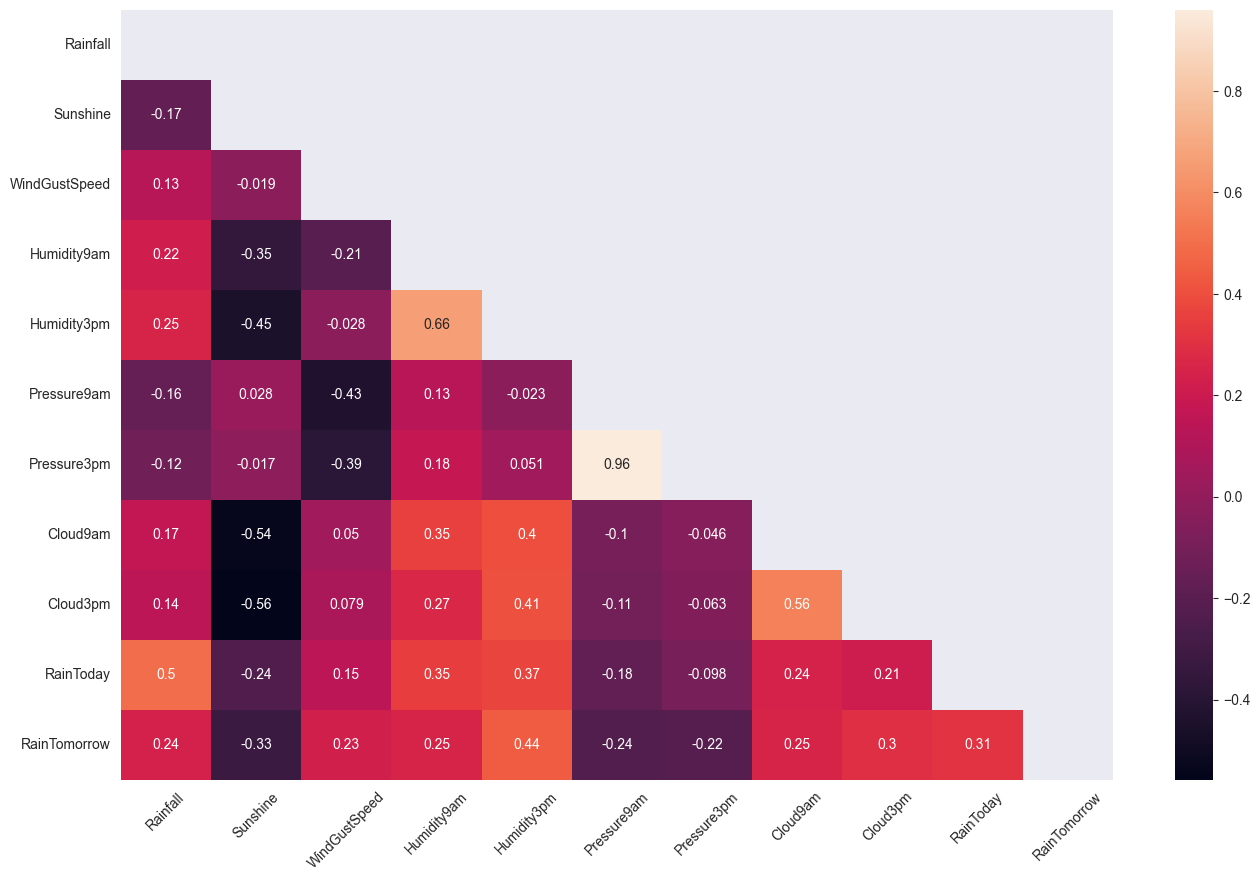

In [43]:
df_train_selected_corr = df_train_selected.corr()
mask = np.triu(np.ones_like(df_train_selected_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(df_train_selected_corr,annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

Same procedure for test data

In [44]:
df_test_selected = df_test_final[['Rainfall', 'Sunshine', 'WindGustSpeed',
                                            'Humidity9am', 'Humidity3pm', 'Pressure9am',
                                            'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                            'RainToday']]
df_test_selected.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,0.0,7.647831,46.0,38.0,30.0,1007.6,1008.7,4.412041,2.000000,0
1,0.0,7.647831,24.0,45.0,16.0,1017.6,1012.8,4.412041,4.466054,0
2,0.0,7.647831,50.0,49.0,19.0,1009.6,1008.2,1.000000,4.466054,0
3,0.0,7.647831,80.0,42.0,9.0,1008.9,1003.6,4.412041,4.466054,0
4,15.6,7.647831,61.0,76.0,93.0,994.3,993.0,8.000000,8.000000,1


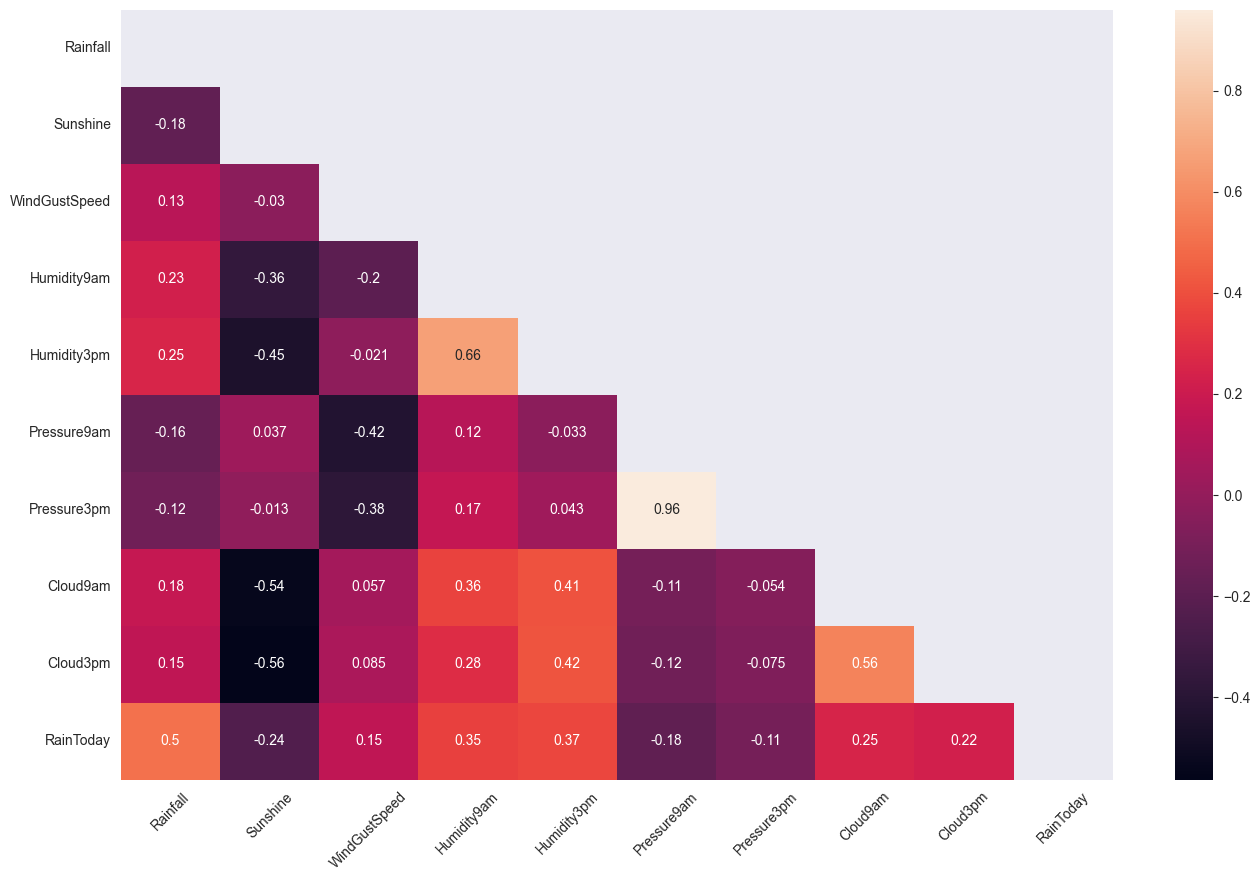

In [45]:
df_test_corr = df_test_selected.corr()
mask = np.triu(np.ones_like(df_test_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(df_test_corr,annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

# 6. ML Training, Testing and Validation
Divide the training and testing data into 80:20 ratio.

The X set contains all the independent variables whereas the y set contains the dependent variable **RainTomorrow**.

In [46]:
x = df_train_selected.drop(['RainTomorrow'], axis=1)
y = df_train_selected['RainTomorrow']

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=10)
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)

(79612, 10) (19904, 10) (79612,) (19904,)


In [48]:
x_test = df_test_selected
print(x_test.shape)

(42250, 10)


## Logistic Regression

In [49]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr.predict(x_val)

array([0, 1, 0, ..., 0, 0, 0])

Regression Score

In [50]:
lr_score = lr.score(x_val, y_val)
lr_accuracy = lr_score*100
print("The classification accuracy of Logistic Regression model is " + str(lr_accuracy)+"%")

The classification accuracy of Logistic Regression model is 84.09867363344051%


**Confusion matrix**

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

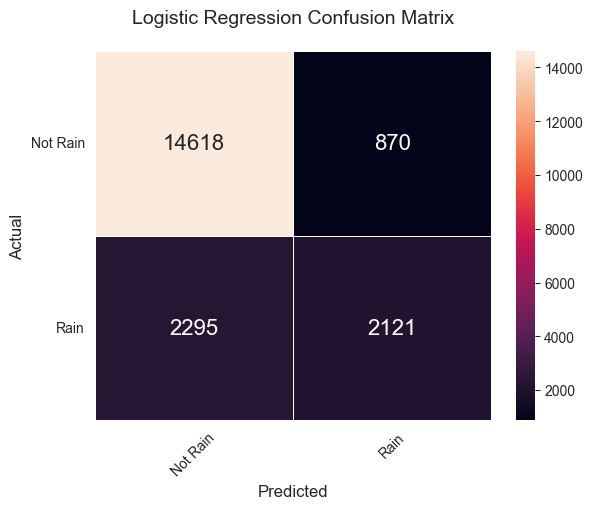

In [51]:
y_pred = lr.predict(x_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

In [52]:
print('Logistic Regression Classification Report')
print('=========================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Logistic Regression Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.94      0.90     15488
        Rain       0.71      0.48      0.57      4416

    accuracy                           0.84     19904
   macro avg       0.79      0.71      0.74     19904
weighted avg       0.83      0.84      0.83     19904



## KNN Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier =  KNeighborsClassifier()
knn_classifier.fit(x_train, y_train).predict(x_val)

array([0, 1, 0, ..., 1, 0, 0])

In [54]:
knn_score = knn_classifier.score(x_val, y_val)
knn_accuracy = knn_score*100
print("The KNN classifier accuracy is " + str(knn_accuracy) + "%")

The KNN classifier accuracy is 82.96824758842443%


Text(0.5, 1.0, 'KNN Confusion Matrix')

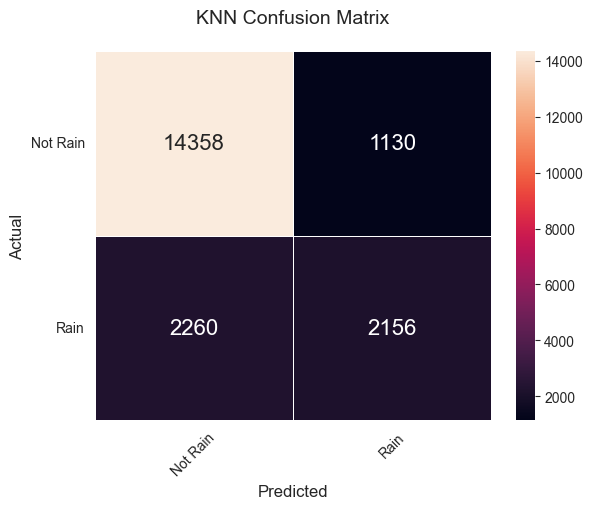

In [55]:
y_pred = knn_classifier.predict(x_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('KNN Confusion Matrix', fontsize=14, pad=20)

In [56]:
print('KNN Classification Report')
print('=========================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

KNN Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.93      0.89     15488
        Rain       0.66      0.49      0.56      4416

    accuracy                           0.83     19904
   macro avg       0.76      0.71      0.73     19904
weighted avg       0.82      0.83      0.82     19904



## Gradient-boosting decision tree (GBDT)

In [57]:
gbt_model = GradientBoostingClassifier()
gbt_model.fit(x_train, y_train).predict(x_val)

array([0, 1, 0, ..., 1, 0, 1])

In [58]:
gbt_score = gbt_model.score(x_val, y_val)
gbt_accuracy = gbt_score*100
print("The accuracy of GBT Classification model is: " + str(gbt_accuracy) + "%")

The accuracy of GBT Classification model is: 84.65132636655949%


Text(0.5, 1.0, 'GBT Confusion Matrix')

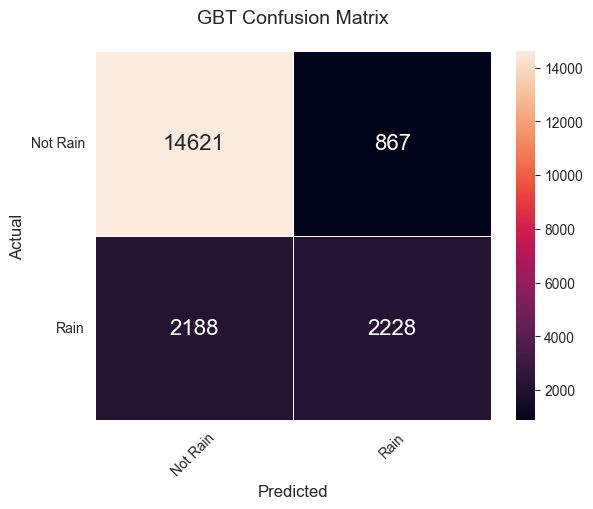

In [59]:
y_pred = gbt_model.predict(x_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('GBT Confusion Matrix', fontsize=14, pad=20)

In [60]:
print("GBT Classification Report")
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

GBT Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.94      0.91     15488
        Rain       0.72      0.50      0.59      4416

    accuracy                           0.85     19904
   macro avg       0.79      0.72      0.75     19904
weighted avg       0.84      0.85      0.84     19904



## Ada Boost Classification

In [61]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(x_train, y_train).predict(x_val)

array([0, 1, 0, ..., 1, 0, 0])

In [62]:
adaboost_model_score = adaboost_model.score(x_val, y_val)
adaboost_model_accuracy = adaboost_model_score*100
print("The accuracy of Ada Boost Classifier is: " + str(adaboost_model_accuracy) + "%")

The accuracy of Ada Boost Classifier is: 84.42021704180064%


Text(0.5, 1.0, 'Ada Boost Confusion Matrix')

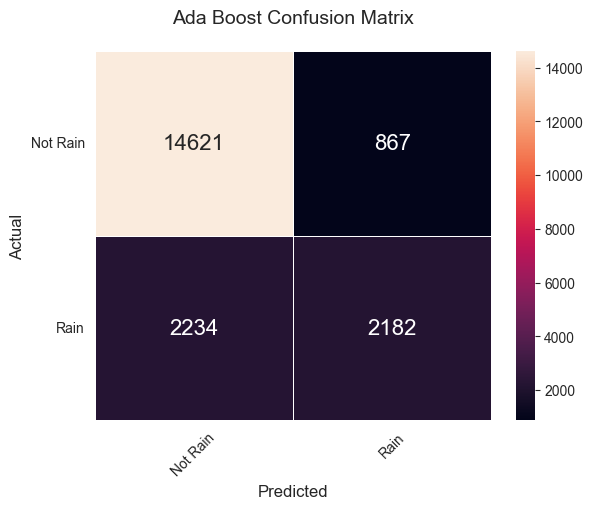

In [63]:
y_pred = adaboost_model.predict(x_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Ada Boost Confusion Matrix', fontsize=14, pad=20)

In [64]:
print('Ada Boost Classification Report')
print('==============================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Ada Boost Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.94      0.90     15488
        Rain       0.72      0.49      0.58      4416

    accuracy                           0.84     19904
   macro avg       0.79      0.72      0.74     19904
weighted avg       0.83      0.84      0.83     19904



## Random Forest Classification

In [65]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train).predict(x_val)

array([0, 1, 0, ..., 0, 0, 1])

In [66]:
rf_model_score = rf_model.score(x_val, y_val)
rf_model_accuracy = rf_model_score*100
print("The classification accuracy of Random Forest model is "+ str(rf_model_accuracy) + "%")

The classification accuracy of Random Forest model is 84.83721864951768%


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

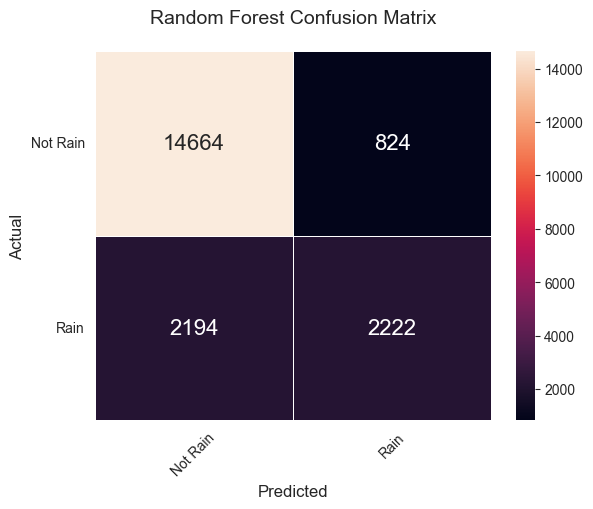

In [67]:
y_pred = rf_model.predict(x_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

In [68]:
print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.95      0.91     15488
        Rain       0.73      0.50      0.60      4416

    accuracy                           0.85     19904
   macro avg       0.80      0.72      0.75     19904
weighted avg       0.84      0.85      0.84     19904



## Deep Learning Classifier

In [69]:
seq_model = keras.Sequential()
seq_model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
seq_model.add(Dense(128, activation='relu'))
seq_model.add(Dense(64, activation='relu'))
seq_model.add(Dense(32, activation='relu'))
seq_model.add(Dense(8, activation='relu'))
seq_model.add(Dense(1, activation='sigmoid'))

seq_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 28,529
Trainable params: 28,529
Non-traina

In [70]:
hist = seq_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=100)

Epoch 1/10


2022-11-28 14:19:46.443512: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


797/797 [==============================] - 1s 1ms/step - loss: 0.4681 - accuracy: 0.8084 - val_loss: 0.3954 - val_accuracy: 0.8377
Epoch 2/10
797/797 [==============================] - 1s 1ms/step - loss: 0.4046 - accuracy: 0.8300 - val_loss: 0.3910 - val_accuracy: 0.8362
Epoch 3/10
797/797 [==============================] - 1s 1ms/step - loss: 0.3995 - accuracy: 0.8298 - val_loss: 0.3834 - val_accuracy: 0.8408
Epoch 4/10
797/797 [==============================] - 1s 1ms/step - loss: 0.3937 - accuracy: 0.8304 - val_loss: 0.3811 - val_accuracy: 0.8398
Epoch 5/10
797/797 [==============================] - 1s 1ms/step - loss: 0.3904 - accuracy: 0.8323 - val_loss: 0.3800 - val_accuracy: 0.8397
Epoch 6/10
797/797 [==============================] - 1s 1ms/step - loss: 0.3906 - accuracy: 0.8322 - val_loss: 0.3955 - val_accuracy: 0.8338
Epoch 7/10
797/797 [==============================] - 1s 1ms/step - loss: 0.3893 - accuracy: 0.8324 - val_loss: 0.3803 - val_accuracy: 0.8401
Epoch 8/10
797/79

In [71]:
seq_model_score = seq_model.evaluate(x_val, y_val)
seq_model_accuracy = round(seq_model_score[1]*100, 2)
print("The classification accuracy of Sequential model is "+ str(seq_model_accuracy)+"%")

622/622 [==============================] - 0s 384us/step - loss: 0.3793 - accuracy: 0.8394
The classification accuracy of Sequential model is 83.94%


## Analysis of Classification Models

In [72]:
accuracy_dict = {'Logistic Regrssion' : lr_accuracy,
                 'K-Nearest Neighbors' : knn_accuracy,
                 'AdaBoost' : adaboost_model_accuracy,
                 'Random Forest' : rf_model_accuracy,
                 'Deep Sequential' : seq_model_accuracy}
print("Classification Accuracy of All Models")
print('=====================================')
print()
for k, v in accuracy_dict.items():
    print(k,"=",v,"%")

Classification Accuracy of All Models

Logistic Regrssion = 84.09867363344051 %
K-Nearest Neighbors = 82.96824758842443 %
AdaBoost = 84.42021704180064 %
Random Forest = 84.83721864951768 %
Deep Sequential = 83.94 %


# 7. Improving Model
We select random forest classifier as base model to improve

## Hyperparameter Optimisation
Using set of parameters to run the model, then select the best one. It is like `ParamGrid` in Spark.

Not that the below command is **very** computational power consuming, it took 15 hours 10 minutes to run on a t2.medium machine on Datalore

In [73]:
# n_estimator = [100, 150, 200]
# max_depth = [10, 15, 20]
# criterion = ['gini', 'entropy']
# bootstrap = [True, False]
# random_state = [10, 20]
# max_feature = ['auto', 'sqrt']
# min_sample_split = [1, 2, 3]
# min_sample_leaf = [1, 2, 3]
#
# hyperF = dict(
#     n_estimators=n_estimator,
#     max_depth=max_depth,
#     criterion=criterion,
#     bootstrap=bootstrap,
#     random_state=random_state,
#     max_features=max_feature,
#     min_samples_split=min_sample_split,
#     min_samples_leaf=min_sample_leaf
# )
#
# randF = GridSearchCV(rf_model, hyperF, cv=3, verbose=1, n_jobs=-1)
# bestF = randF.fit(x_train, y_train)

In [74]:
# print("Results from Random Search : \n" )
# print("The best estimator across ALL searched params: \n", randF.best_estimator_)
# print("The best parameters across ALL searched params: \n", randF.best_params_)

**Results from Random Search**


The best estimator across ALL searched params:

 RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2， n_estimators=200, random_state=10)

The best parameters across ALL searched params: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 10}

## Fit the new model using the best parameters, eg.:
- Bootstrap: True
- Criterion: entropy
- Max depth: 15
- Max feature: auto
- Min samples leaf: 2
- Min samples split: 2
- $n$ estimator: 200
- Random state: 10

In [76]:
rforest_model = RandomForestClassifier(n_estimators=int(200),
                                       max_depth=15,
                                       criterion='entropy',
                                       bootstrap=True,
                                       random_state=10,
                                       max_features='auto',
                                       min_samples_split=2,
                                       min_samples_leaf=2)
rforest_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=2, n_estimators=200, random_state=10)

In [78]:
rforest_model_score = rforest_model.score(x_val, y_val)
rforest_model_accuracy = rforest_model_score*100
print("The classification accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

The classification accuracy of Random Forest model is 84.9527733118971%


Text(0.5, 1.0, 'Optimised Random Forest Confusion Matrix')

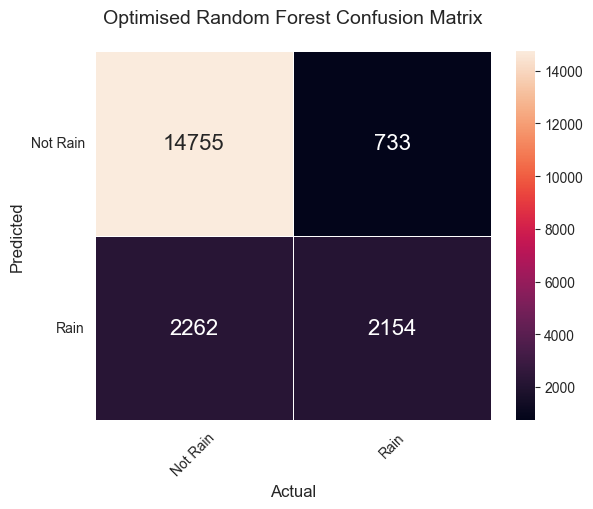

In [79]:
y_pred = rforest_model.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Optimised Random Forest Confusion Matrix', fontsize=14, pad=20)

In [80]:
print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.95      0.91     15488
        Rain       0.75      0.49      0.59      4416

    accuracy                           0.85     19904
   macro avg       0.81      0.72      0.75     19904
weighted avg       0.84      0.85      0.84     19904



## Prediction Using Optimised Random Forest Model

In [81]:
predicted_value = rforest_model.predict(x_test)

In [83]:
df_optimised_pred = df_test_final
df_optimised_pred["Pred_RainTmr"] = predicted_value
df_optimised_pred.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Pred_RainTmr
0,12.9,25.7,0.0,5.489715,7.647831,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,1,0
1,9.2,28.0,0.0,5.489715,7.647831,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
2,14.3,25.0,0.0,5.489715,7.647831,50.0,20.0,24.0,49.0,19.0,...,0,0,0,0,0,0,1,0,0,0
3,9.7,31.9,0.0,5.489715,7.647831,80.0,7.0,28.0,42.0,9.0,...,1,0,0,0,0,0,0,0,0,0
4,15.9,18.6,15.6,5.489715,7.647831,61.0,28.0,28.0,76.0,93.0,...,0,0,0,0,0,0,0,0,0,1
